In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [3]:
import pandas as pd
df = pd.read_csv('dataset/creditcard_2023.csv', encoding = 'latin1')

In [6]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


#Data Checking

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [9]:
df.duplicated().any()

False

<Axes: ylabel='Class'>

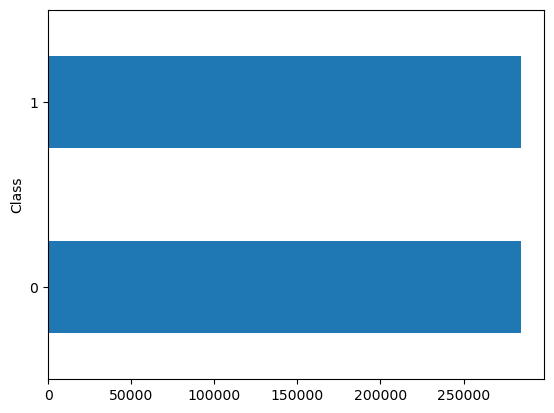

In [10]:
df['Class'].value_counts().plot(kind = 'barh')

In [4]:
X = df.drop(['id', 'Class'], axis = 1)
y = df['Class']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

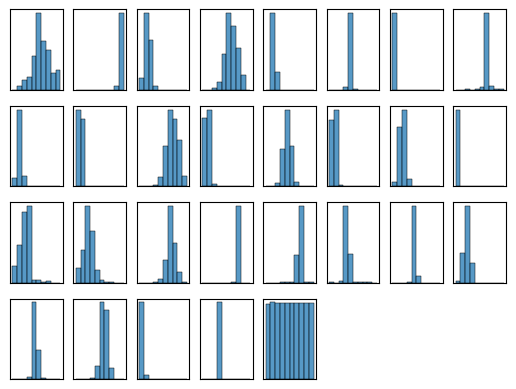

In [39]:
for i, column in enumerate(X.columns):
    plt.subplot(4, 8, i + 1) 
    sns.histplot(X[column], bins=10, kde=False) 
    plt.gca().set_yticks([]) 
    plt.gca().set_xticks([]) 
    # plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

# plt.tight_layout()
plt.show()

# Split data into train and test data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardization

In [6]:
#Seem columns show normal distribution, so I use standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model_list = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']


# Logistic Regression

In [20]:
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
y_pred_LR = model_LR.predict(X_test_scaled)

In [21]:
print("Confusion Matrix:")
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)

Confusion Matrix:
[[55472  1252]
 [ 2714 54288]]


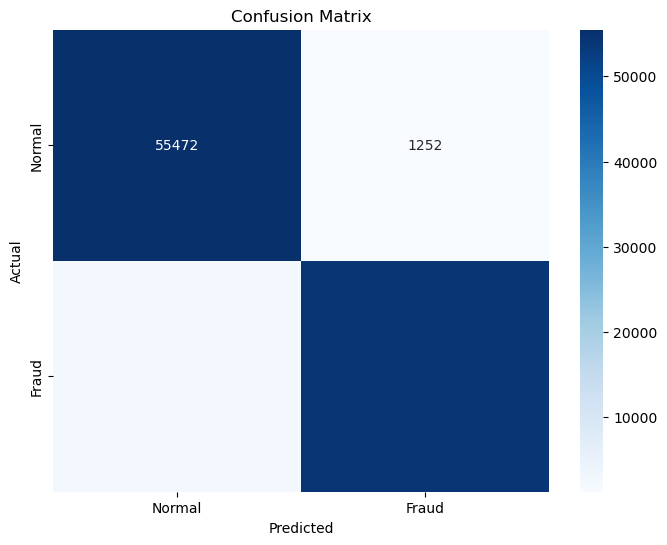

In [95]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_LR, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9534    0.9779    0.9655     56724
           1     0.9775    0.9524    0.9648     57002

    accuracy                         0.9651    113726
   macro avg     0.9654    0.9652    0.9651    113726
weighted avg     0.9654    0.9651    0.9651    113726



In [22]:
accuracy_score_list = []
accuracy_score_list.append(accuracy_score(y_test, y_pred_LR))
print(accuracy_score_list)

[0.9651267080526881]


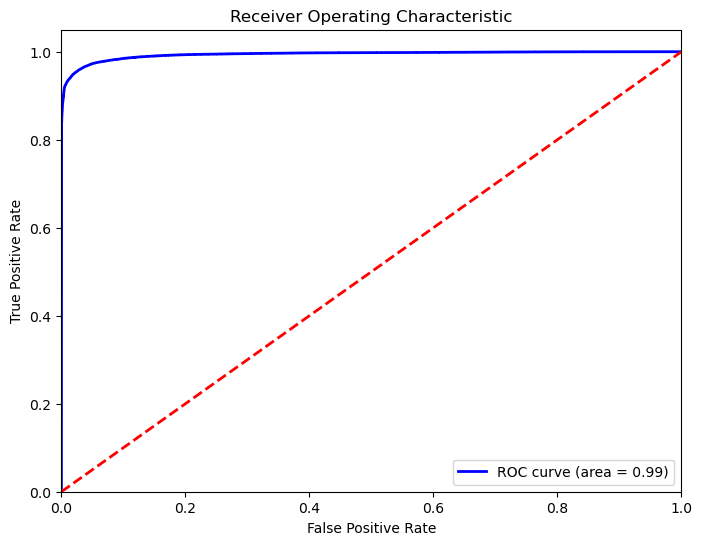

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model_LR.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

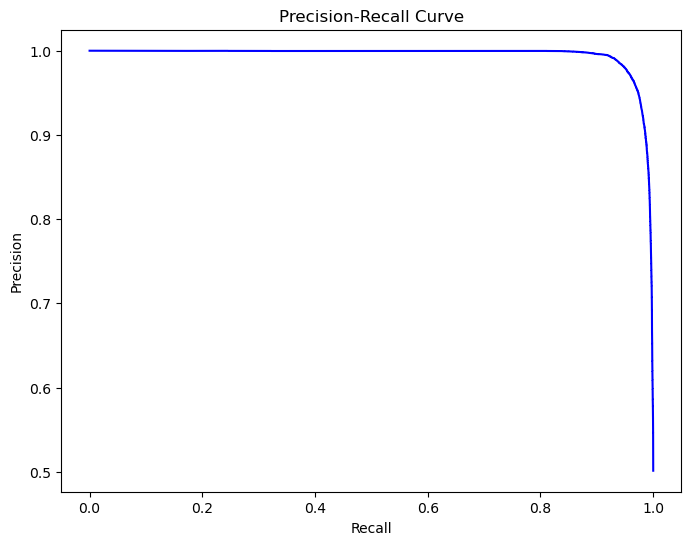

In [32]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model_LR.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# KNN

In [8]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)
y_pred_KNN = model_KNN.predict(X_test_scaled)

In [10]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:")
print(cm_KNN)

Confusion Matrix:
[[56482   242]
 [    0 57002]]


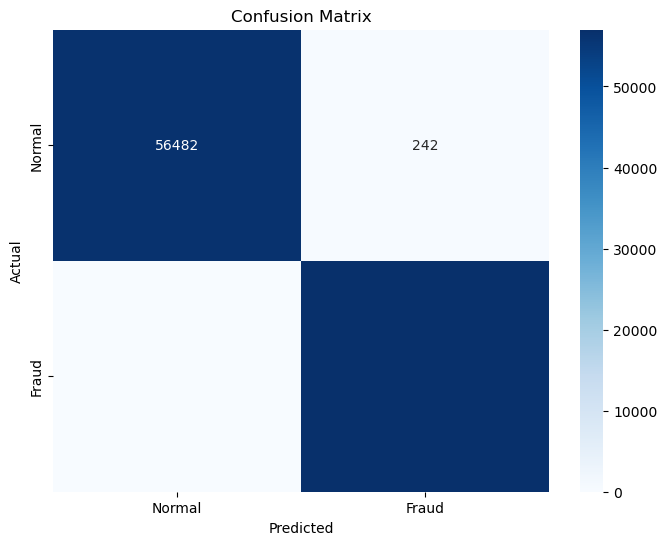

In [11]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_KNN, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_KNN, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9957    0.9979     56724
           1     0.9958    1.0000    0.9979     57002

    accuracy                         0.9979    113726
   macro avg     0.9979    0.9979    0.9979    113726
weighted avg     0.9979    0.9979    0.9979    113726



In [24]:
accuracy_score_list.append(accuracy_score(y_test, y_pred_KNN))
print(accuracy_score_list)

[0.9651267080526881, 0.9978720785044757]


In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.datasets import load_iris

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X_scaled = scaler.fit_transform(X)
scores_kf = cross_val_score(model_KNN, X_scaled, y, cv = kf)
print(f'Cross-Validation Scores: {scores_kf }')
print(f'Mean Accuracy: {np.mean(scores_kf ):.2f}')

Cross-Validation Scores: [0.99756785 0.99756256 0.99784218]
Mean Accuracy: 1.00


# SVM

In [13]:
model_SVM = SVC()
model_SVM.fit(X_train_scaled, y_train)
y_pred_SVM = model_SVM.predict(X_test_scaled)

In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVM, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9975    0.9966    0.9970     56724
           1     0.9966    0.9975    0.9971     57002

    accuracy                         0.9971    113726
   macro avg     0.9971    0.9971    0.9971    113726
weighted avg     0.9971    0.9971    0.9971    113726



In [15]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:")
print(cm_SVM)

Confusion Matrix:
[[56530   194]
 [  141 56861]]


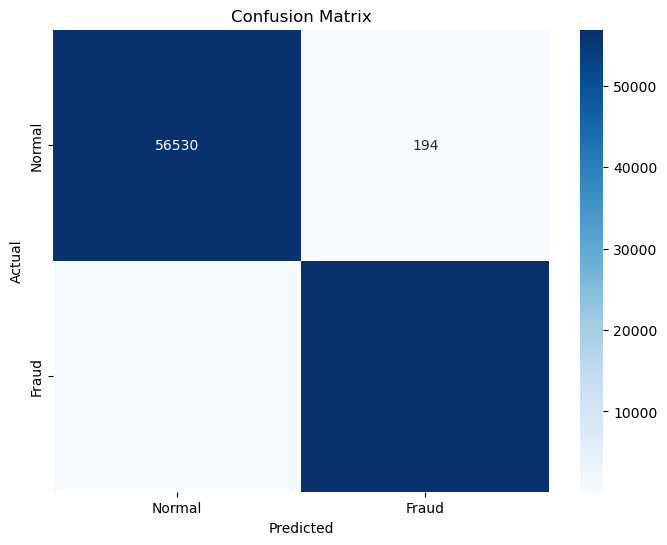

In [16]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_SVM, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
accuracy_score_list.append(accuracy_score(y_test, y_pred_SVM))
print(accuracy_score_list)

[0.9651267080526881, 0.9978720785044757, 0.9970543235495841]


# Random Forest

In [26]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_scaled, y_train)
y_pred_RF = model_RF.predict(X_test_scaled)

In [27]:
y_train_predict_RF = model_RF.predict(X_train_scaled)
print("\nClassification Report for train data:")
print(classification_report(y_train, y_train_predict_RF))

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_predict_RF))

print(accuracy_score(y_train, y_train_predict_RF))


Classification Report for train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227591
           1       1.00      1.00      1.00    227313

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

Confusion Matrix:
[[227591      0]
 [     0 227313]]
1.0


In [44]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RF, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9998    0.9999     56724
           1     0.9998    1.0000    0.9999     57002

    accuracy                         0.9999    113726
   macro avg     0.9999    0.9999    0.9999    113726
weighted avg     0.9999    0.9999    0.9999    113726



In [29]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(cm_RF)

Confusion Matrix:
[[56710    14]
 [    0 57002]]


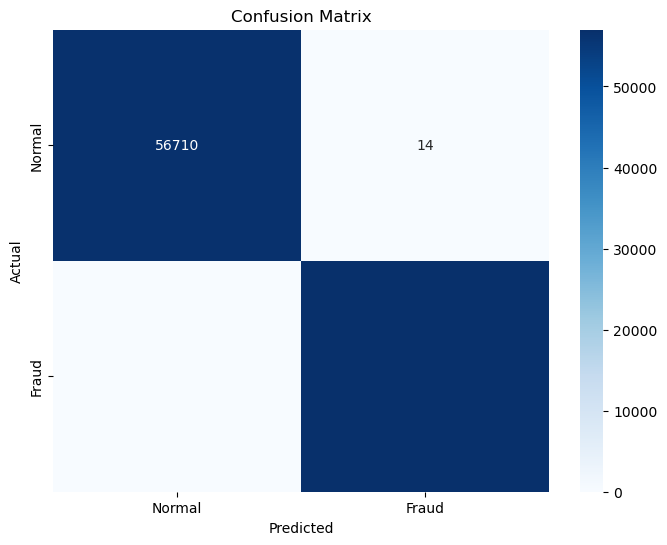

In [30]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_RF, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
accuracy_score_RF

0.9998768971035648

# K-Fold for Random Forest

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=4)
model_RF_kf = RandomForestClassifier(n_estimators=100, random_state=4)
accuracies_RF_kf = []

for train_index, test_index in kf.split(X):
    X_train_RF_kf, X_test_RF_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_RF_kf, y_test_RF_kf = y.iloc[train_index], y.iloc[test_index]

    X_train_RF_kf_scaled = scaler.transform(X_train_RF_kf)
    X_test_RF_kf_scaled = scaler.transform(X_test_RF_kf)

    model_RF_kf.fit(X_train_RF_kf_scaled, y_train_RF_kf)
    y_pred_RF_kf = model_RF_kf.predict(X_test_RF_kf_scaled)

    accuracies_RF_kf.append(accuracy_score(y_test_RF_kf, y_pred_RF_kf))

print("Accuracies for each fold:", accuracies_RF_kf)
print("Average accuracy:", np.mean(accuracies_RF_kf))

Accuracies for each fold: [0.9998681040395336, 0.9998417248474404, 0.999903276295658, 0.9998417248474404, 0.999903276295658]
Average accuracy: 0.9998716212651461


# Hyperparameter Tuning

In [48]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model_RF_HT = RandomForestClassifier(random_state=37)

random_search = RandomizedSearchCV(estimator=model_RF_HT, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', 
                                   random_state=37, n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best cross-validated accuracy: 0.9998659058363456


In [53]:
# Compare origial and after hyperparameter tuning
model_RF_afterHT = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1,max_features='sqrt', max_depth=None)
model_RF_afterHT.fit(X_train_scaled, y_train)
y_pred_RF_afterHT  = model_RF_afterHT.predict(X_test_scaled)
accuracy_score_RF_afterHT = accuracy_score(y_test, y_pred_RF_afterHT)

print("Original accuracy:", accuracy_score_RF)
print("Accuracy adter hyperparameter tuning:", accuracy_score_RF_afterHT)

Original accuracy: 0.9998768971035648
Accuracy adter hyperparameter tuning: 0.9998768971035648


In [54]:
print("\nOriginal Classification Report:")
print(classification_report(y_test, y_pred_RF))

print("\nTuned Classification Report:")
print(classification_report(y_test, y_pred_RF_afterHT))


Original Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Tuned Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [55]:
print("Original Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_RF))

print("Tuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_RF_afterHT))

Original Confusion Matrix:
[[56710    14]
 [    0 57002]]
Tuned Confusion Matrix:
[[56710    14]
 [    0 57002]]


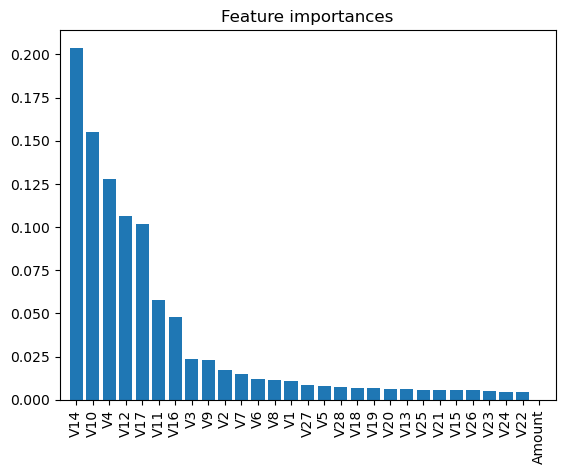

Feature Importances:
V14: 0.2038
V10: 0.1549
V4: 0.1278
V12: 0.1064
V17: 0.1018
V11: 0.0576
V16: 0.0481
V3: 0.0234
V9: 0.0232
V2: 0.0172
V7: 0.0148
V6: 0.0119
V8: 0.0112
V1: 0.0109
V27: 0.0085
V5: 0.0079
V28: 0.0074
V18: 0.0069
V19: 0.0069
V20: 0.0064
V13: 0.0064
V25: 0.0057
V21: 0.0056
V15: 0.0055
V26: 0.0054
V23: 0.0052
V24: 0.0046
V22: 0.0044
Amount: 0.0001


In [63]:
importances = model_RF_afterHT.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

print("Feature Importances:")
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.4f}")

In [77]:
# keep > 0.01
X_featured = X[[X.columns[i] for i in indices if importances[i] >= 0.01]]
X_train_featured, X_test_featured, y_train_featured, y_test_featured = train_test_split(X_featured, y, test_size=0.2, random_state=0)

X_train_featured_scaled = scaler.fit_transform(X_train_featured)
X_test_featured_scaled = scaler.fit_transform(X_test_featured)

In [78]:
model_RF_afterHT.fit(X_train_featured_scaled, y_train_featured)
y_pred_RF_HT_featured  = model_RF_afterHT.predict(X_test_featured_scaled)
accuracy_score_RF_HT_featured = accuracy_score(y_test_featured, y_pred_RF_HT_featured)

In [79]:
print("\nClassification Report:")
print(classification_report(y_test_featured, y_pred_RF_afterHT))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



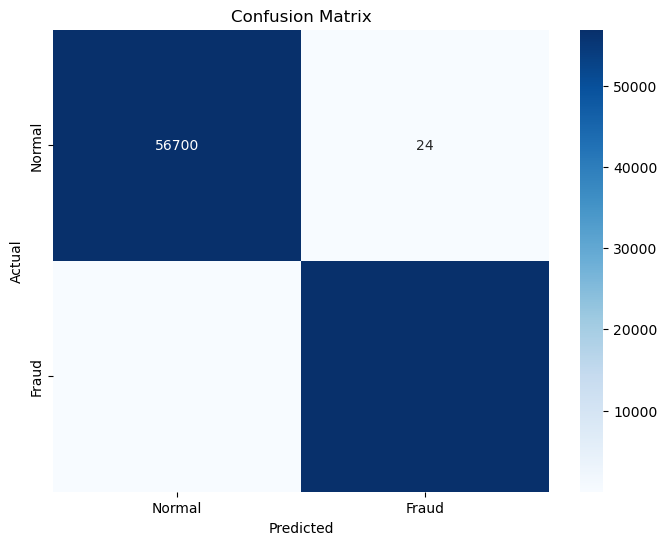

In [94]:
cm_RF_HT_featured = confusion_matrix(y_test_featured, y_pred_RF_HT_featured)

plt.figure(figsize = (8, 6))
sns.heatmap(cm_RF_HT_featured, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
cm_RF_HT_featured

array([[56700,    24],
       [  139, 56863]])

# Further Dimensional Reduction

In [101]:
importances_list = [0.006, 0.008, 0.01, 0.012, 0.02, 0.024]

for a in range(len(importances_list)):
    tempX = X[[X.columns[i] for i in indices if importances[i] >= importances_list[a]]]
    tempX_train, tempX_test, tempY_train, tempY_test = train_test_split(tempX, y, test_size=0.2, random_state=0)

    tempX_train_scaled = scaler.fit_transform(tempX_train)
    tempX_test_scaled = scaler.fit_transform(tempX_test)

    model_RF_afterHT.fit(tempX_train_scaled, tempY_train)
    tempY_pred = model_RF_afterHT.predict(tempX_test_scaled)
    temp_accuracy_score_RF = accuracy_score(tempY_test, tempY_pred)

    print("Number of feature:", tempX.shape[1], ", number of feature reduced:", X.shape[1] - tempX.shape[1])
    print("Importances cut off:", importances_list[a])
    print("\nClassification Report:")
    print(classification_report(tempY_test, tempY_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(tempY_test, tempY_pred))
    print("\nAccuracy:", temp_accuracy_score_RF)

Number of feature: 21 , number of feature reduced: 8
Importances cut off: 0.006

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56707    17]
 [   71 56931]]

Accuracy: 0.9992262103652639
Number of feature: 15 , number of feature reduced: 14
Importances cut off: 0.008

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56705    19]
 [  156 56846]]

Accuracy

In [106]:
tempX = X[[X.columns[i] for i in indices if importances[i] >= 0.02]]

pipeline = Pipeline([('scaler', scaler), ('classifier', model_RF)])
param_grid = {'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20]}

grid_search = GridSearchCV(pipeline, param_grid, cv=4, n_jobs=-1, verbose=2)
grid_search.fit(tempX, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 2.6min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 2.7min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 2.8min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 2.8min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.9min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 5.1min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 5.5min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 5.5min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 3.0min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 6.1min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.8min


In [107]:
model_RF_final = RandomForestClassifier(n_estimators=200)

finalX_train, finalX_test, finalY_train, finalY_test = train_test_split(tempX, y, test_size=0.2, random_state=0)
finalX_train_scaled = scaler.fit_transform(finalX_train)
finalX_test_scaled = scaler.fit_transform(finalX_test)

model_RF_final.fit(finalX_train_scaled, finalY_train)
finalY_pred_RF_final = model_RF_final.predict(finalX_test_scaled)

In [108]:
accuracy_score_RF_final = accuracy_score(finalY_test, finalY_pred_RF_final)

print("Original accuracy:", accuracy_score_RF)
print("Final accuracy:", accuracy_score_RF_final)

Original accuracy: 0.9998768971035648
Final accuracy: 0.9996043121186009


In [109]:
print("\nOriginal Classification Report:")
print(classification_report(y_test, y_pred_RF))

print("\nFinal Classification Report:")
print(classification_report(finalY_test, finalY_pred_RF_final))


Original Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [112]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print("Original Confusion Matrix:")
print(cm_RF)

cm_RF_final = confusion_matrix(finalY_test, finalY_pred_RF_final)
print("Tuned Confusion Matrix:")
print(confusion_matrix(finalY_test, finalY_pred_RF_final))

Original Confusion Matrix:
[[56710    14]
 [    0 57002]]
Tuned Confusion Matrix:
[[56692    32]
 [   13 56989]]


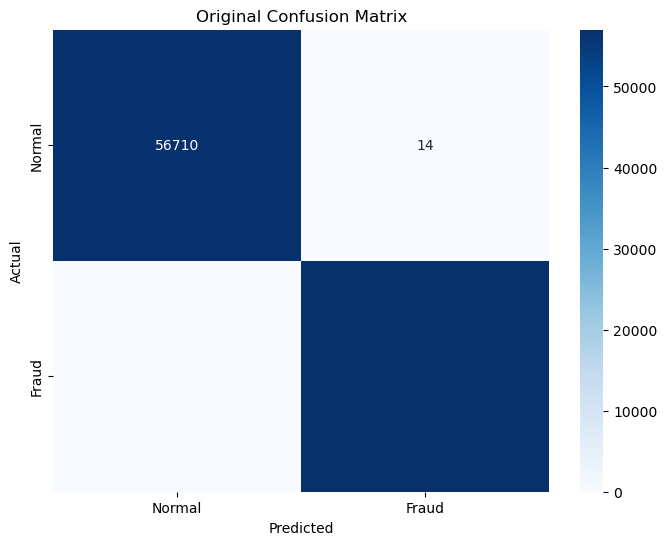

In [113]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_RF, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Original Confusion Matrix')
plt.show()

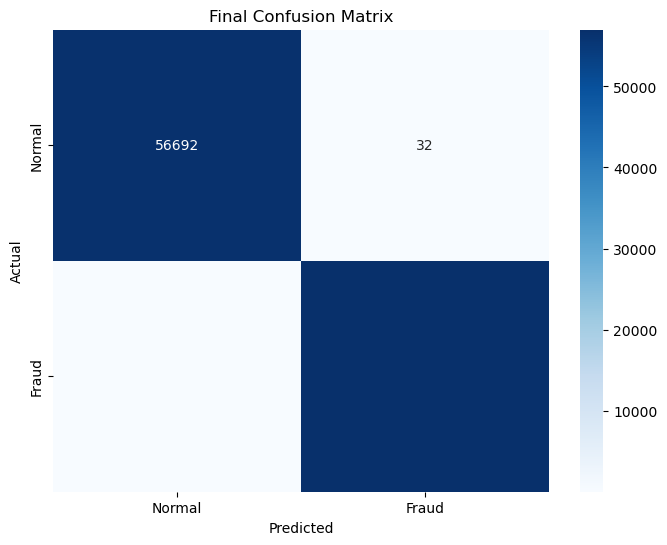

In [114]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm_RF_final, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()